# Assignment-1

## Name: Swaroop Srisailam
### Roll No.:22239

### Importing the dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff
from sympy.matrices import Matrix, Inverse, Transpose
from mpl_toolkits import mplot3d
plt.style.use('seaborn')

## Newton Raphson Method

In [28]:
def grad_f():
    """
    Description:Function to calculate gradient 
    """
    x, y = symbols('x y', real = True)
    f= x**3+y**2-3*x*y
    Grad_f= [diff(f,x),diff(f,y)]
    return Grad_f
def jacobi():        #takes grad_f as an input
    """
     Description:Function to calculate jacobi matrix
    """
    gf = grad_f()
    x, y = symbols('x y', real = True)
    j_matrix = [[diff(gf[0],x), diff(gf[0],y)],[diff(gf[1],x), diff(gf[1],y)]]
    return j_matrix



def N_R_Method():    #takes j_matrix as an input
    """
     Description:Function to calculate the critical points using Newton Raphson Method
     Author: Swaroop
    """
    x0 = Matrix([0,0])
    gf_trans = grad_f()
    jacobi_M = jacobi()
    x, y = symbols('x y', real = True)
    jacobi_M = [[jacobi_M[0][0].subs(x, x0[0]).subs(y, x0[1]), jacobi_M[0][1].subs(x,x0[0]).subs(y,x0[1])],[jacobi_M[1][0].subs(x,x0[0]).subs(y,x0[1]),jacobi_M[1][1].subs(x,x0[0]).subs(y,x0[1])]]
    jacobi_M = Matrix(jacobi_M)
    jacobi_M_inv = Inverse(jacobi_M)

    for i in range(0,50):
        g_x0 = [gf_trans[0].subs(x,x0[0]).subs(y,x0[1]), gf_trans[1].subs(x,x0[0]).subs(y,x0[1])]
        g_x0 = Matrix(g_x0)
        x1 = x0 - jacobi_M_inv * g_x0
        x0 = x1
    return x0

N_R_Method()

Matrix([
[0],
[0]])

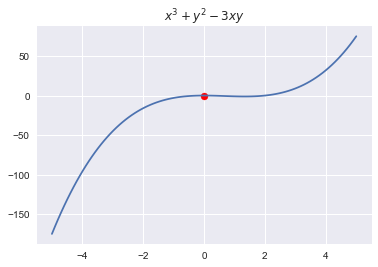

In [22]:
def f(x,y):
    return  x**3+y**2-3*x*y
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
plt.plot(x,f(x,y))
plt.scatter(0,f(0,0),color='r')
plt.title('$ x^3 +y^2-3xy$')
plt.show()

### The Red Point is the saddle point of the equation $ x^3 +y^3+3xy$

## Gradient Descent Algorithm

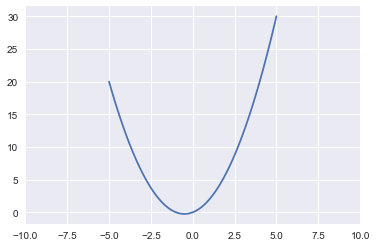

In [18]:
def obj(x): #Object function
    return x**2+x

x = np.linspace(-5,5,100)
plt.plot(x,obj(x))
plt.xlim(-10, 10)
plt.show()

In [19]:
def dx(x): #derivative of the function
    return x*2.0+1.0


 --->0 f([0.19604494]) = 0.23448
 --->1 f([0.05683596]) = 0.06007
 --->2 f([-0.05453124]) = -0.05156
 --->3 f([-0.14362499]) = -0.12300
 --->4 f([-0.21489999]) = -0.16872
 --->5 f([-0.27191999]) = -0.19798
 --->6 f([-0.31753599]) = -0.21671
 --->7 f([-0.3540288]) = -0.22869
 --->8 f([-0.38322304]) = -0.23636
 --->9 f([-0.40657843]) = -0.24127
 --->10 f([-0.42526274]) = -0.24441
 --->11 f([-0.44021019]) = -0.24643
 --->12 f([-0.45216816]) = -0.24771
 --->13 f([-0.46173452]) = -0.24854
 --->14 f([-0.46938762]) = -0.24906
 --->15 f([-0.4755101]) = -0.24940
 --->16 f([-0.48040808]) = -0.24962
 --->17 f([-0.48432646]) = -0.24975
 --->18 f([-0.48746117]) = -0.24984
 --->19 f([-0.48996894]) = -0.24990
 --->20 f([-0.49197515]) = -0.24994
 --->21 f([-0.49358012]) = -0.24996
 --->22 f([-0.49486409]) = -0.24997
 --->23 f([-0.49589128]) = -0.24998
 --->24 f([-0.49671302]) = -0.24999
 --->25 f([-0.49737042]) = -0.24999
 --->26 f([-0.49789633]) = -0.25000
 --->27 f([-0.49831707]) = -0.25000
 --->28 

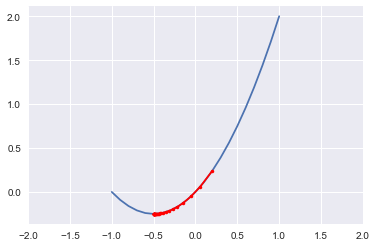

In [20]:
def gradient_descent(objective, derivative, bounds, n_it, step_size):
    """
        Description:Function to Calculate the critical point using Gradient Descent.
        Function plots every step till it reaches the cp.
        Parameters:objective, (Objective function)
                   derivative,(Derivative of objective)
                   bounds, (Float) 
                   n_it, (int[No. of iterations])
                   step_size.(Float[Learning rate])
        Author:Swaroop Srisailam
    """
   
    solutions, scores = list(), list()
   
    solution = bounds[:, 0] +np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    
    for i in range(n_it):   #running the gradient descent
        gradient = dx(solution)
        solution = solution - step_size * gradient
        y = objective(solution)
        solutions.append(solution)
        scores.append(y)
        print(' --->%d f(%s) = %.5f' % (i, solution, y)) #the progress
    return [solutions, scores]
 

bounds = np.asarray([[-1.0, 1.0]]) #range for input
                                            
it = 30 #total iterations

lr = 0.1  #Learning rate
solutions, scores = gradient_descent(obj, dx, bounds, it, lr)

x = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)

y = obj(x)

plt.plot(x, y)  #plotting the eqation
plt.plot(solutions, scores, '.-', color='red') #plotting the path 
plt.xlim(-2,2)
plt.show() #displaying the plot

## Golden Section 

In [15]:
def f(x):  #Objective Function
    return x**2

def GS():
     """
        Description:Function to Calculate the critical point using golden section method.
        Author:Swaroop Srisailam
    """
    it = int(input("Enter The number Of Iterations:"))
    xl = int(input("enter xl value :"))
    xr = int(input("enter xr value :"))
    err = float(input("enter error value :"))

    while(it):   #n iterations it loops
        if (err < abs(xl-xr)): #if error is less than the differemce
            x1 = xr - 0.618 * (xr-xl)
            x2 = xl + 0.618 * (xr-xl)

            f1 = float(f(x1))
            f2 = float(f(x2))

            if f1>f2:
                xr = x2
            elif f1<f2:
                xl = x1
            else:
                xl = x1
                xr = x2

            it = it-1
            print("iterations = ",it)
            print("xl = ",xl)
            print("xr = ",xr)
        else:
            break

    print("After Golden Section Method:\n")
    fle = f(x1)
    fri = f(x2)

    if fle>fri:
        print("The Extreme Point = \n",x1)
        print("f(x) at Extreme Point = \n",fle)

    else:
        print("The Extreme Point = \n",x2)
        print("f(x) at Extreme Point = \n",fri)
        

In [16]:
GS()#calling the golden Section function

Enter The number Of Iterations:23
enter xl value :-1
enter xr value :1
enter error value :.09
iterations =  22
xl =  -0.236
xr =  0.236
iterations =  21
xl =  -0.05569599999999997
xr =  0.05569599999999997
iterations =  20
xl =  -0.013144255999999993
xr =  0.013144255999999993
After Golden Section Method:

The Extreme Point = 
 0.013144255999999993
f(x) at Extreme Point = 
 0.00017277146579353583
